In [1]:
# EDA
import pandas as pd
import numpy as np

## date handling
from datetime import datetime, timedelta
from pytz import timezone


# visualizing
import seaborn as sns
import matplotlib.pyplot as plt

# modelling
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor

# accuracy metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scaling
from sklearn.preprocessing import StandardScaler

# deployment
import pickle as pkl
from sklearn.pipeline import Pipeline

## for ignoring deprecation warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data =pd.read_csv(r'budget.csv')
data=data.sort_values(['date_time'],ascending=True)
data

,date_time,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50
...,...,...,...
1525,2023-06-01 13:05:55 +0000,Coffe,7.10
1526,2023-06-01 13:58:29 +0000,Learning,6.00
1527,2023-06-01 17:14:15 +0000,Other,5.00
1528,2023-06-02 05:07:58 +0000,Market,8.53


## Explatory Data Analyse

In [3]:
data['date_time']=pd.to_datetime(data['date_time'])
current_datetime = datetime.now(timezone('UTC'))

In [4]:
data['time_diff'] =(current_datetime - data['date_time']).dt.days
data['hours']=data['date_time'].dt.hour
data['Weekday'] = data['date_time'].dt.weekday
data['Weekday']=data['Weekday']+1
data['Year'] = data['date_time'].dt.year
data['Day_of_Year'] = data['date_time'].dt.dayofyear
data['Month'] = data['date_time'].dt.month
data

,date_time,category,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,330,5,3,2022,187,7
1,2022-07-06 05:57:27+00:00,Market,2.00,330,5,3,2022,187,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,330,5,3,2022,187,7
3,2022-07-06 05:58:25+00:00,Market,17.33,330,5,3,2022,187,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,330,5,3,2022,187,7
...,...,...,...,...,...,...,...,...,...
1525,2023-06-01 13:05:55+00:00,Coffe,7.10,0,13,4,2023,152,6
1526,2023-06-01 13:58:29+00:00,Learning,6.00,0,13,4,2023,152,6
1527,2023-06-01 17:14:15+00:00,Other,5.00,0,17,4,2023,152,6
1528,2023-06-02 05:07:58+00:00,Market,8.53,0,5,5,2023,153,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1530 entries, 0 to 1529
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date_time    1530 non-null   datetime64[ns, UTC]
 1   category     1530 non-null   object             
 2   amount       1530 non-null   float64            
 3   time_diff    1530 non-null   int64              
 4   hours        1530 non-null   int32              
 5   Weekday      1530 non-null   int32              
 6   Year         1530 non-null   int32              
 7   Day_of_Year  1530 non-null   int32              
 8   Month        1530 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(5), int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
data.describe()

,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
count,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000,1530.000000
mean,13.744157,160.020261,12.168627,4.069281,2022.479739,181.971242,6.488235
std,38.419980,91.952217,4.691426,2.013794,0.499753,114.474495,3.754421
min,0.050000,0.000000,0.000000,1.000000,2022.000000,1.000000,1.000000
25%,4.185000,86.000000,9.000000,2.000000,2022.000000,73.000000,3.000000
50%,6.700000,157.500000,12.000000,4.000000,2022.000000,192.000000,7.000000
75%,10.127500,235.000000,16.000000,6.000000,2023.000000,286.000000,10.000000
max,733.250000,330.000000,21.000000,7.000000,2023.000000,365.000000,12.000000


In [7]:
pd.DataFrame(data['category'].value_counts())

,count
category,
Coffe,487
Market,397
Restuarant,199
Business lunch,103
Transport,85
Taxi,66
Phone,43
Learning,26
Health,24


In [8]:
print(data.isna().sum())
print(data.duplicated().sum())

date_time      0
category       0
amount         0
time_diff      0
hours          0
Weekday        0
Year           0
Day_of_Year    0
Month          0
dtype: int64
0


In [9]:
df =data.copy()

# Assuming 'df' is your DataFrame with a 'date_time' column and an 'amount' column

# Convert 'date_time' column to datetime type if needed
df['date_time'] = pd.to_datetime(df['date_time'])

# Group by hourly average expenses
hourly_avg_expenses = df.groupby(df['date_time'].dt.hour)['amount'].mean().reset_index()
hourly_avg_expenses.columns = ['Hour', 'Hourly_Avg_Expenses']

# Group by daily average expenses
daily_avg_expenses = df.groupby(df['date_time'].dt.date)['amount'].mean().reset_index()
daily_avg_expenses.columns = ['Date', 'Daily_Avg_Expenses']

# Group by weekly average expenses
weekly_avg_expenses = df.resample('W', on='date_time')['amount'].mean().reset_index()
weekly_avg_expenses.columns = ['Week', 'Weekly_Avg_Expenses']

# Group by monthly average expenses
monthly_avg_expenses = df.groupby(df['date_time'].dt.month)['amount'].mean().reset_index()
monthly_avg_expenses.columns = ['Month', 'Monthly_Avg_Expenses']

# Group by yearly average expenses
yearly_avg_expenses = df.groupby(df['date_time'].dt.year)['amount'].mean().reset_index()
yearly_avg_expenses.columns = ['Year', 'Yearly_Avg_Expenses']

# Combine the results into a single DataFrame
combined_expenses = pd.concat([hourly_avg_expenses, daily_avg_expenses, weekly_avg_expenses, monthly_avg_expenses, yearly_avg_expenses], axis=1)

# Display the combined DataFrame
combined_expenses

,Hour,Hourly_Avg_Expenses,Date,Daily_Avg_Expenses,Week,Weekly_Avg_Expenses,Month,Monthly_Avg_Expenses,Year,Yearly_Avg_Expenses
0,0.0,104.166667,2022-07-06,7.610588,2022-07-10 00:00:00+00:00,9.361000,1.0,11.945801,2022.0,12.728442
1,1.0,8.000000,2022-07-07,6.910000,2022-07-17 00:00:00+00:00,14.424762,2.0,11.413630,2023.0,14.845668
2,2.0,1.950000,2022-07-08,5.255000,2022-07-24 00:00:00+00:00,9.207273,3.0,15.579521,NaN,NaN
3,3.0,8.337500,2022-07-09,19.566667,2022-07-31 00:00:00+00:00,108.817500,4.0,21.393077,NaN,NaN
4,4.0,12.446667,2022-07-10,17.000000,2022-08-07 00:00:00+00:00,8.332083,5.0,16.249500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
317,NaN,NaN,2023-05-29,8.290000,NaT,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,2023-05-30,5.835000,NaT,NaN,NaN,NaN,NaN,NaN
319,NaN,NaN,2023-05-31,9.177500,NaT,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,2023-06-01,12.625000,NaT,NaN,NaN,NaN,NaN,NaN


In [10]:
pd.DataFrame(data.groupby(['category'])['amount'].sum()).sort_values(['amount'],ascending=False).head()

,amount
category,
Coffe,4068.85
Restuarant,3756.59
Market,2268.43
Clothing,1715.50
Communal,1676.50


In [11]:
pd.DataFrame(data.groupby(['Year'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Year,
2023,10896.72
2022,10131.84


In [12]:
pd.DataFrame(data.groupby(['Month'])['amount'].sum()).sort_values(['amount'],ascending=False)

,amount
Month,
7,2861.38
5,2599.92
3,2274.61
4,2224.88
1,2162.19
10,2001.12
12,1605.53
2,1540.84
9,1338.48


In [13]:
pd.DataFrame(data.groupby(['Weekday'])['amount'].sum()).sort_values(['amount'],ascending=False)  ## sum

,amount
Weekday,
4,3929.17
6,3493.46
5,3033.64
1,2934.59
3,2792.15
2,2457.50
7,2388.05


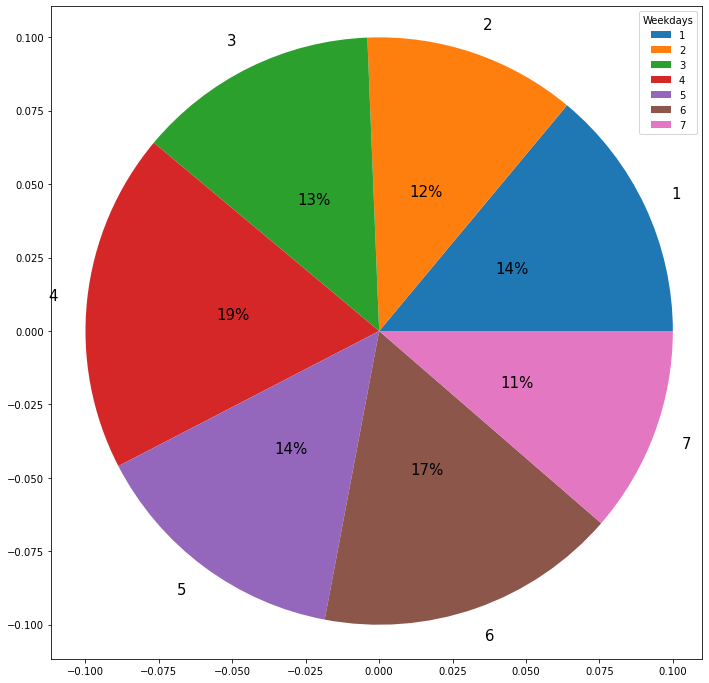

In [15]:
df_weekday=pd.DataFrame(data.groupby(['Weekday'])['amount'].sum()).sort_values(['Weekday'],ascending=True)  ## sum
plt.figure(figsize=(19,12))

plt.pie(df_weekday.amount,labels=df_weekday.index,shadow=False,frame=True,radius=.1, pctdistance = 0.5, autopct = "%0.0f%%",textprops={"fontsize":15} )

plt.legend(title = "Weekdays", loc="upper right")
plt.show()

<AxesSubplot:>

<Figure size 1368x720 with 0 Axes>

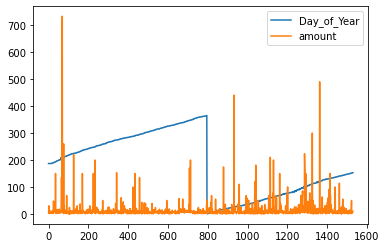

In [16]:
plt.figure(figsize=(19,10))
data[['Day_of_Year','amount']].plot()   ## operational count

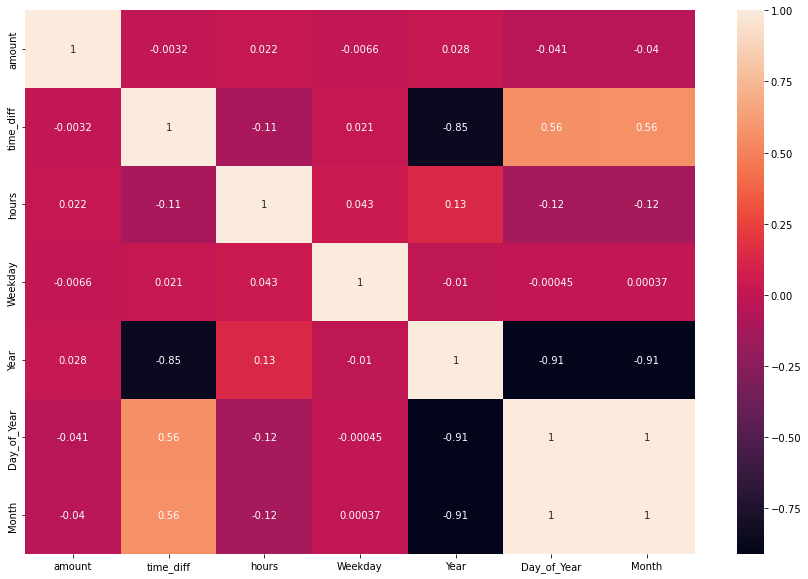

In [39]:
# Select only the numeric columns from the DataFrame
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True)

plt.show()


Amount volume outliers: ['Communal' 'Clothing' 'Motel' 'Travel' 'Rent Car' 'Learning' 'Events'
 'Restuarant' 'joy' 'Health' 'Sport']


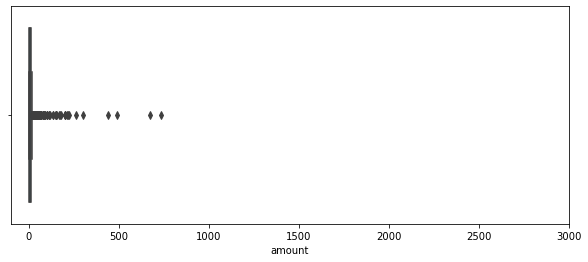

In [40]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=data['amount'])
print('Amount volume outliers:',data['category'][data['amount']>70].unique())

## Data Preparation For Modelling

In [41]:
data

,date_time,category,amount,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,330,5,3,2022,187,7
1,2022-07-06 05:57:27+00:00,Market,2.00,330,5,3,2022,187,7
2,2022-07-06 05:58:12+00:00,Coffe,30.10,330,5,3,2022,187,7
3,2022-07-06 05:58:25+00:00,Market,17.33,330,5,3,2022,187,7
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,330,5,3,2022,187,7
...,...,...,...,...,...,...,...,...,...
1525,2023-06-01 13:05:55+00:00,Coffe,7.10,0,13,4,2023,152,6
1526,2023-06-01 13:58:29+00:00,Learning,6.00,0,13,4,2023,152,6
1527,2023-06-01 17:14:15+00:00,Other,5.00,0,17,4,2023,152,6
1528,2023-06-02 05:07:58+00:00,Market,8.53,0,5,5,2023,153,6


In [42]:
target=data.amount
target

0        5.50
1        2.00
2       30.10
3       17.33
4        5.50
        ...  
1525     7.10
1526     6.00
1527     5.00
1528     8.53
1529    10.00
Name: amount, Length: 1530, dtype: float64

In [43]:
features = data.drop(columns=['date_time','amount'])
features

,category,time_diff,hours,Weekday,Year,Day_of_Year,Month
0,Restuarant,330,5,3,2022,187,7
1,Market,330,5,3,2022,187,7
2,Coffe,330,5,3,2022,187,7
3,Market,330,5,3,2022,187,7
4,Restuarant,330,5,3,2022,187,7
...,...,...,...,...,...,...,...
1525,Coffe,0,13,4,2023,152,6
1526,Learning,0,13,4,2023,152,6
1527,Other,0,17,4,2023,152,6
1528,Market,0,5,5,2023,153,6


## Encoding

In [44]:
features = pd.get_dummies(features, columns = ['category'],drop_first=True)
features

,time_diff,hours,Weekday,Year,Day_of_Year,Month,category_Clothing,category_Coffe,category_Communal,category_Events,...,category_Other,category_Phone,category_Rent Car,category_Restuarant,category_Sport,category_Taxi,category_Tech,category_Transport,category_Travel,category_joy
0,330,5,3,2022,187,7,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,330,5,3,2022,187,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,330,5,3,2022,187,7,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,330,5,3,2022,187,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,330,5,3,2022,187,7,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,0,13,4,2023,152,6,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1526,0,13,4,2023,152,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1527,0,17,4,2023,152,6,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1528,0,5,5,2023,153,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
print(features.shape)
print(target.shape)

(1530, 25)
(1530,)


## Splitting

In [46]:
X_train,X_test, Y_train,Y_test = train_test_split(features,target, test_size = 0.3, random_state = 1)

## Scaling

In [47]:
# Create a StandardScaler object
scaler = StandardScaler()

scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Prediction on RandomForest

In [48]:
rf = RandomForestRegressor(n_estimators=1024,max_depth=64,min_samples_leaf=8,min_samples_split=8)

In [49]:
rf.fit(X_train_scaled,Y_train)

RandomForestRegressor(max_depth=64, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=1024)

In [50]:
prediction = rf.predict(X_test_scaled)

## Accuracy Metrics

In [51]:
# Calculate evaluation metrics
mse = mean_squared_error(Y_test, prediction)
rmse = mean_squared_error(Y_test, prediction, squared=False)
mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)

# Perform cross-validation and calculate the mean score
scores = cross_val_score(rf, features, target, cv=5)
mean_score = scores.mean()

# Print the mean score
print(f"Mean cross-validation score: {mean_score}")

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean cross-validation score: 0.24173028859789483
Mean Squared Error (MSE): 713.6982091618996
Root Mean Squared Error (RMSE): 26.71513071579287
Mean Absolute Error (MAE): 11.09381952134678
R-squared (R^2): 0.1279023164772316


## Deploying Model

In [52]:
## saving model
filename = 'rf.pkl'
pkl.dump(rf, open(filename, 'wb'))
loaded_model = pkl.load(open(filename, 'rb')) 

## deploying
result = loaded_model.score(X_train_scaled, Y_train)
print(result)

0.30011971438586327


In [68]:
from datetime import datetime, timedelta
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pytz import timezone


def predict_feature_expenses(category, month):
    try:
        # Filter the data for the specified category
        category_data = data[data['category'] == category].copy()

        if category_data.empty:
            raise ValueError(f"No data available for the category: {category}")

        # Generate features for prediction
        category_data['date_time'] = pd.to_datetime(category_data['date_time'])
        current_datetime = datetime.now(timezone('UTC'))
        category_data['time_diff'] = (current_datetime - category_data['date_time']).dt.days
        category_data['hours'] = category_data['date_time'].dt.hour
        category_data['Weekday'] = category_data['date_time'].dt.weekday + 1
        category_data['Year'] = category_data['date_time'].dt.year
        category_data['Day_of_Year'] = category_data['date_time'].dt.strftime('%j').astype(int)
        category_data['Month'] = category_data['date_time'].dt.month

        # Split the data into features (X) and target variable (y)
        X = category_data[['time_diff', 'Month', 'Weekday', 'Year', 'Day_of_Year', 'hours']]
        y = category_data['amount']

        # Create a pipeline with feature scaling and regression
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', RandomForestRegressor())
        ])

        # Train the pipeline
        pipeline.fit(X, y)

        # Prepare data for prediction
        current_datetime = datetime.now(timezone('UTC')).replace(tzinfo=None)
        future_date = current_datetime + timedelta(days=30 * month)
        future_data = pd.DataFrame({
            'time_diff': [(current_datetime - future_date).days],
            'Month': [future_date.month],
            'Weekday': [future_date.weekday() + 1],
            'Year': [future_date.year],
            'Day_of_Year': [(future_date - datetime(future_date.year, 1, 1)).days + 1],
            'hours': [future_date.hour]
        }, columns=X.columns)

        # Make predictions for the future data
        predicted_expenses = pipeline.predict(future_data)

        return predicted_expenses

    except ValueError as ve:
        print(ve)
    except Exception as e:
        print(f"An error occurred: {e}")


# Assuming 'data' is your DataFrame containing the relevant columns and data

predicted_expenses = predict_feature_expenses('Coffe', 1)
if predicted_expenses is not None:
    print(f"Predicted expenses for coffee, 1 month later: {predicted_expenses}")


Predicted expenses for coffee, 1 month later: [8.025]


## Feature Impacts

In [71]:
feature_names= features.columns

In [72]:
importance_scores = rf.feature_importances_

In [73]:
sorted_indices = importance_scores.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importance_scores = importance_scores[sorted_indices]

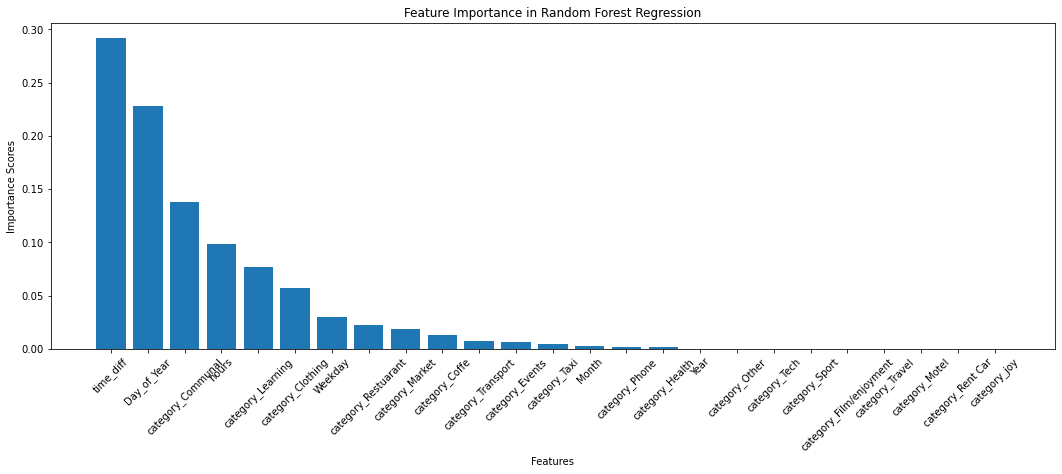

In [74]:
# Plot feature importance
plt.figure(figsize=(18, 6))
plt.bar(range(len(sorted_importance_scores)), sorted_importance_scores, tick_label=sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance in Random Forest Regression')
plt.xticks(rotation=45)
plt.show()